# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "http://api.openweathermap.org/data/2.5/weather?q={}&appid={}&units=imperial".format(city, weather_api_key)

# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | ribera
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | maragogi
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | muzhi
Processing Record 7 of Set 1 | capreol
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | laguna
Processing Record 11 of Set 1 | santa isabel
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | adrar
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | grand gaube
Pro

Processing Record 39 of Set 4 | poum
Processing Record 40 of Set 4 | mandalgovi
Processing Record 41 of Set 4 | shcholkine
City not found. Skipping...
Processing Record 42 of Set 4 | deputatskiy
Processing Record 43 of Set 4 | martapura
Processing Record 44 of Set 4 | leshukonskoye
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | luganville
Processing Record 47 of Set 4 | aklavik
Processing Record 48 of Set 4 | bernalillo
Processing Record 49 of Set 4 | peniche
Processing Record 0 of Set 5 | qaanaaq
Processing Record 1 of Set 5 | khandyga
Processing Record 2 of Set 5 | mocajuba
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | andros town
Processing Record 5 of Set 5 | flinders
Processing Record 6 of Set 5 | krasnofarfornyy
Processing Record 7 of Set 5 | kiunga
Processing Record 8 of Set 5 | kalmunai
Processing Record 9 of Set 5 | port alfred
Processing Record 10 of Set 5 | thongwa
Processing Record 11 of Set 5 | kavaratti
Processing 

Processing Record 28 of Set 8 | tucuman
Processing Record 29 of Set 8 | iqaluit
Processing Record 30 of Set 8 | altay
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | bolivar
Processing Record 33 of Set 8 | pontal do parana
Processing Record 34 of Set 8 | eyl
Processing Record 35 of Set 8 | kieta
Processing Record 36 of Set 8 | belaya gora
Processing Record 37 of Set 8 | ati
Processing Record 38 of Set 8 | mantua
Processing Record 39 of Set 8 | grand centre
City not found. Skipping...
Processing Record 40 of Set 8 | el alto
Processing Record 41 of Set 8 | udachnyy
Processing Record 42 of Set 8 | olafsvik
Processing Record 43 of Set 8 | rio grande
Processing Record 44 of Set 8 | naze
Processing Record 45 of Set 8 | prince rupert
Processing Record 46 of Set 8 | xai-xai
Processing Record 47 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 48 of Set 8 | torbay
Processing Record 49 of Set 8 | bani
Processing Record 0 of Set 9 | mergui
City not found. S

Processing Record 15 of Set 12 | wuning
Processing Record 16 of Set 12 | namatanai
Processing Record 17 of Set 12 | vrangel
Processing Record 18 of Set 12 | rafai
Processing Record 19 of Set 12 | coihaique
Processing Record 20 of Set 12 | usinsk
Processing Record 21 of Set 12 | salta
Processing Record 22 of Set 12 | rajanpur
Processing Record 23 of Set 12 | alvorada
Processing Record 24 of Set 12 | dalianwan
Processing Record 25 of Set 12 | gwanda
Processing Record 26 of Set 12 | puerto del rosario
Processing Record 27 of Set 12 | limbe
Processing Record 28 of Set 12 | lima
Processing Record 29 of Set 12 | ada
Processing Record 30 of Set 12 | mahon
Processing Record 31 of Set 12 | elbistan
Processing Record 32 of Set 12 | bridgwater
Processing Record 33 of Set 12 | sabzevar
Processing Record 34 of Set 12 | amga
Processing Record 35 of Set 12 | san carlos de bariloche
Processing Record 36 of Set 12 | tombouctou
Processing Record 37 of Set 12 | ribas do rio pardo
Processing Record 38 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,67.80,69,11,19.15,ZA,1679341704
1,ribera,37.4984,13.2642,53.65,89,77,1.52,IT,1679341705
2,rikitea,-23.1203,-134.9692,79.57,78,2,12.91,PF,1679341706
3,maragogi,-9.0122,-35.2225,80.51,75,100,8.70,BR,1679341707
4,mahebourg,-20.4081,57.7000,77.29,94,40,1.14,MU,1679341708


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Starter_Code/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,67.80,69,11,19.15,ZA,1679341704
1,ribera,37.4984,13.2642,53.65,89,77,1.52,IT,1679341705
2,rikitea,-23.1203,-134.9692,79.57,78,2,12.91,PF,1679341706
3,maragogi,-9.0122,-35.2225,80.51,75,100,8.70,BR,1679341707
4,mahebourg,-20.4081,57.7000,77.29,94,40,1.14,MU,1679341708


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

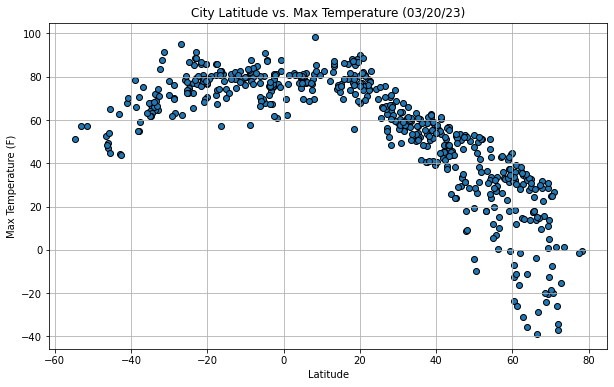

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
# Set title and labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set grid line and figure size
plt.grid(True)
plt.gcf().set_size_inches(10, 6)

# Save the figure
plt.savefig("Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

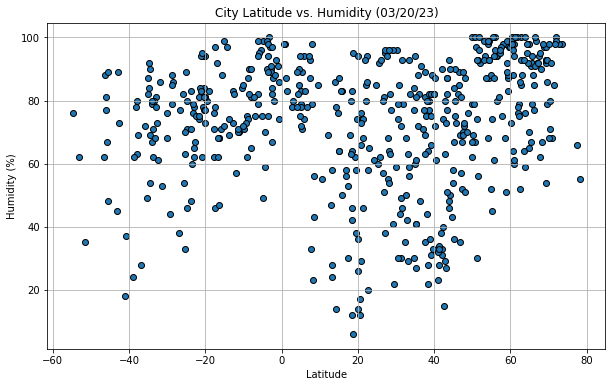

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Set title and labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid line and figure size
plt.grid(True)
plt.gcf().set_size_inches(10, 6)

# Save the figure
plt.savefig("Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

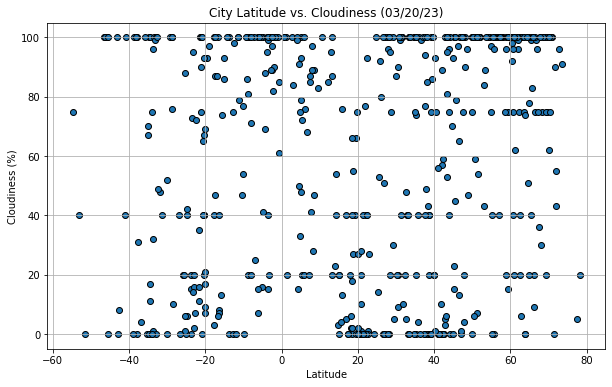

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
# Set title and labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid line and figure size
plt.grid(True)
plt.gcf().set_size_inches(10, 6)

# Save the figure
plt.savefig("Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

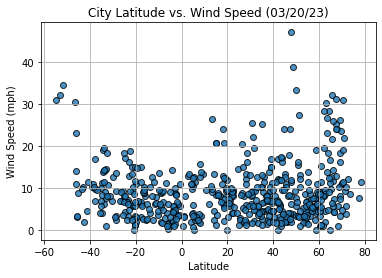

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # Create plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,2)}",text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    # Print r-value
    print(f"The r-value is: {rvalue}")
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ribera,37.4984,13.2642,53.65,89,77,1.52,IT,1679341705
5,muzhi,65.3667,64.6667,17.56,91,99,9.75,RU,1679341710
6,capreol,46.7060,-80.9225,33.55,69,100,8.05,CA,1679341711
8,nikolskoye,59.7035,30.7861,44.49,97,100,8.43,RU,1679341712
9,laguna,38.4210,-121.4238,59.61,64,0,13.80,US,1679341713


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,67.80,69,11,19.15,ZA,1679341704
2,rikitea,-23.1203,-134.9692,79.57,78,2,12.91,PF,1679341706
3,maragogi,-9.0122,-35.2225,80.51,75,100,8.70,BR,1679341707
4,mahebourg,-20.4081,57.7000,77.29,94,40,1.14,MU,1679341708
7,bambous virieux,-20.3428,57.7575,77.25,94,40,1.14,MU,1679341712


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8648127411409945


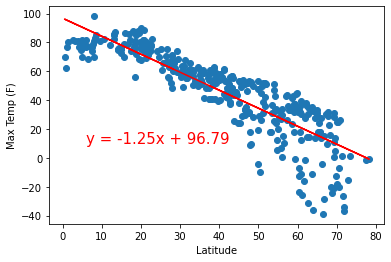

In [15]:
# Linear regression on Northern Hemisphere
# Define the x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot and linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.5653225645707092


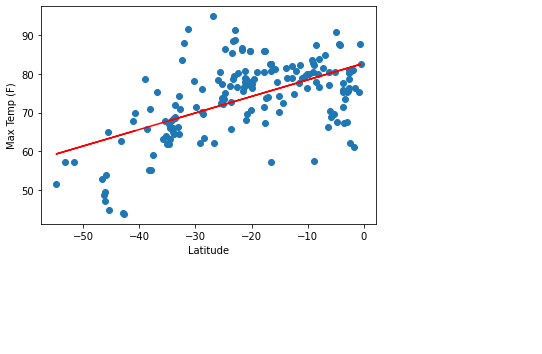

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot and linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** By examining the slope of the line and the axes, it is clear that as one moves closer to the equator - 0 on each respective axis - the Max Temp (f) seems to increase. There is a negative relationship in the northern hemisphere where it is more strongly correlated that the farther you stray from the equator, the lower the Max Temp (F) tends to be.   

### Humidity vs. Latitude Linear Regression Plot

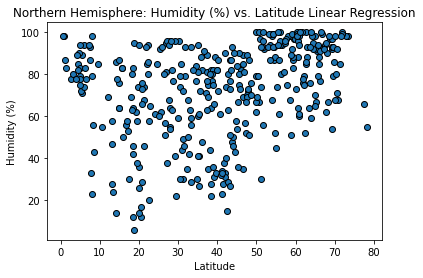

In [17]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    ...
# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors="black")

# Add linear regression line
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity (%)", (6,10))

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude Linear Regression")

# Save figure
plt.savefig("Starter_Code/output_data/Northern_Hemi_Humidity_vs_Latitude_LR.png")

# Show plot
plt.show()

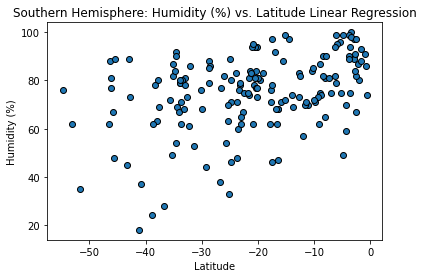

In [18]:
# Southern Hemisphere

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors="black")

# Add linear regression line
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity (%)", (6,10))

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude Linear Regression")

# Save figure
plt.savefig("Starter_Code/output_data/Southern_Hemi_Humidity_vs_Latitude_LR.png")

# Show plot
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

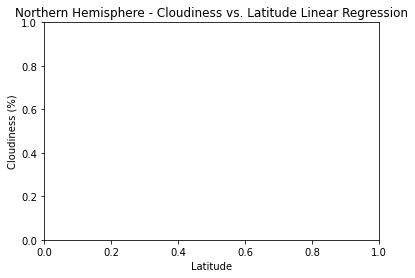

In [19]:
# Northern Hemisphere
# Add linear regression line
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (40,10))

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Save and show plot
plt.savefig("Starter_Code/output_data/north_cloudiness_vs_lat_regression.png")
plt.show()

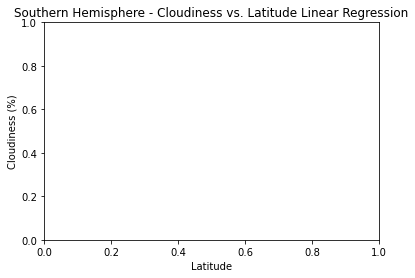

In [21]:
# Southern Hemisphere
# Add linear regression line
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness (%)", (6,10))

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Save and show plot
plt.savefig("Starter_Code/output_data/south_cloudiness_vs_lat_regression.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

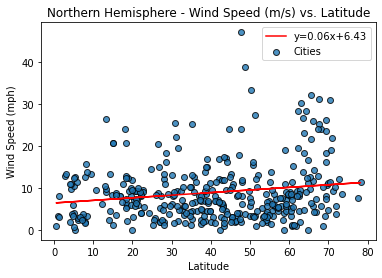

In [22]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
northern_hemi_slope, northern_hemi_int, northern_hemi_r, northern_hemi_p, northern_hemi_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Create scatter plot with linear regression line
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.plot(northern_hemi_df["Lat"], northern_hemi_slope * northern_hemi_df["Lat"] + northern_hemi_int, color="red", label=f"y={round(northern_hemi_slope,2)}x+{round(northern_hemi_int,2)}")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (m/s) vs. Latitude")

# Add legend to plot
plt.legend()

# Display plot
plt.show()

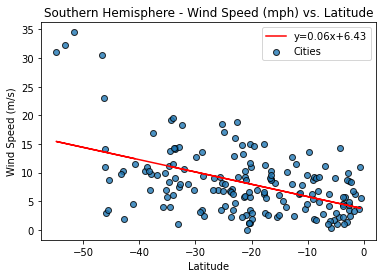

In [23]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
southern_hemi_slope, southern_hemi_int, southern_hemi_r, southern_hemi_p, southern_hemi_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Create scatter plot with linear regression line
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.plot(southern_hemi_df["Lat"], southern_hemi_slope * southern_hemi_df["Lat"] + southern_hemi_int, color="red", label=f"y={round(northern_hemi_slope,2)}x+{round(northern_hemi_int,2)}")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")

# Add legend to plot
plt.legend()

# Display plot
plt.show()

**Discussion about the linear relationship:** The relationship between wind speed and latitude in the Northern and Southern is mildly positive in that as you get further from the equator you get, the migher the Wind Speeds tend to be. 